In [1]:
import pandas as pd 
import yfinance as yf

import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 300

df = yf.download('AAPL',
                 start = '1999-12-31',
                 end= '2010-12-31')

d1 = pd.DataFrame(df['Adj Close'])
d1.rename(columns={'Adj Close':'adj_close'}, inplace=True)
d1['simple_rtn']=d1.adj_close.pct_change()
d1.head()

[*********************100%***********************]  1 of 1 completed


,adj_close,simple_rtn
Date,,
1999-12-31,0.781300,NaN
2000-01-03,0.850644,0.088754
2000-01-04,0.778926,-0.084310
2000-01-05,0.790324,0.014633
2000-01-06,0.721930,-0.086538


使用指数移动平均线 (EMA) 均值和标准差作为边界。

In [6]:
d1[['mean', 'std']] = d1['simple_rtn'].ewm(span=21).agg(['mean', 'std'])
d1.head()

# 删除一些NaN
d1.dropna(inplace=True)

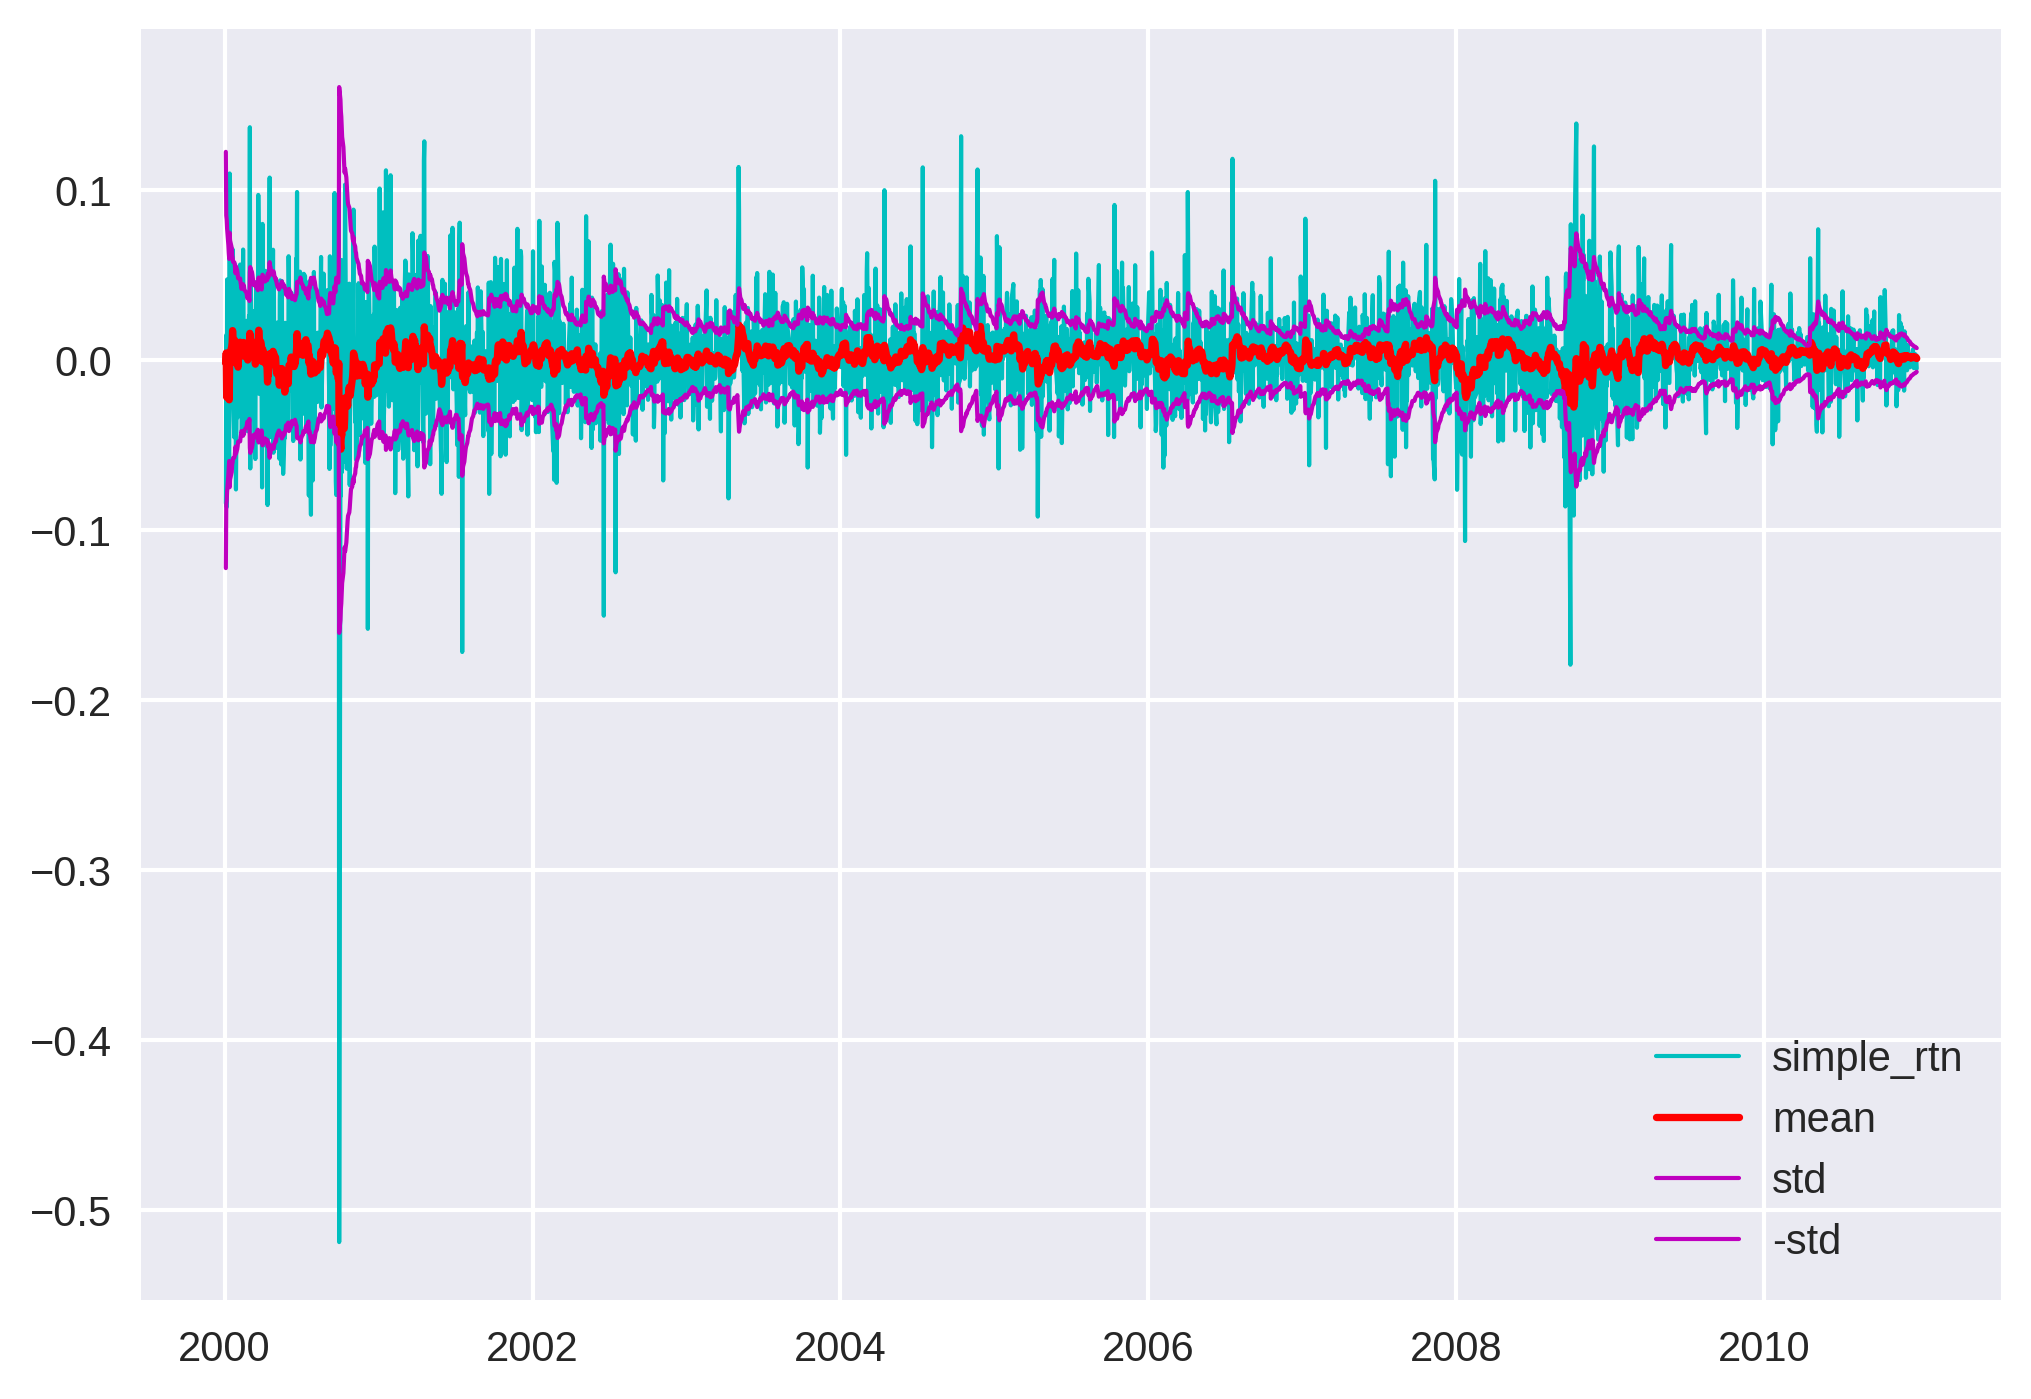

In [7]:
fig, ax = plt.subplots()
ax.plot(d1.index, d1['simple_rtn'], label='simple_rtn',c='c', lw=1)
ax.plot(d1.index, d1['mean'], label= 'mean',c='r')
ax.plot(d1.index, d1[ 'std'], label= 'std',linestyle='-',c='m', lw=1 )
ax.plot(d1.index, -d1['std'],label='-std', linestyle='-',c='m', lw=1)
ax.legend(loc='lower right')

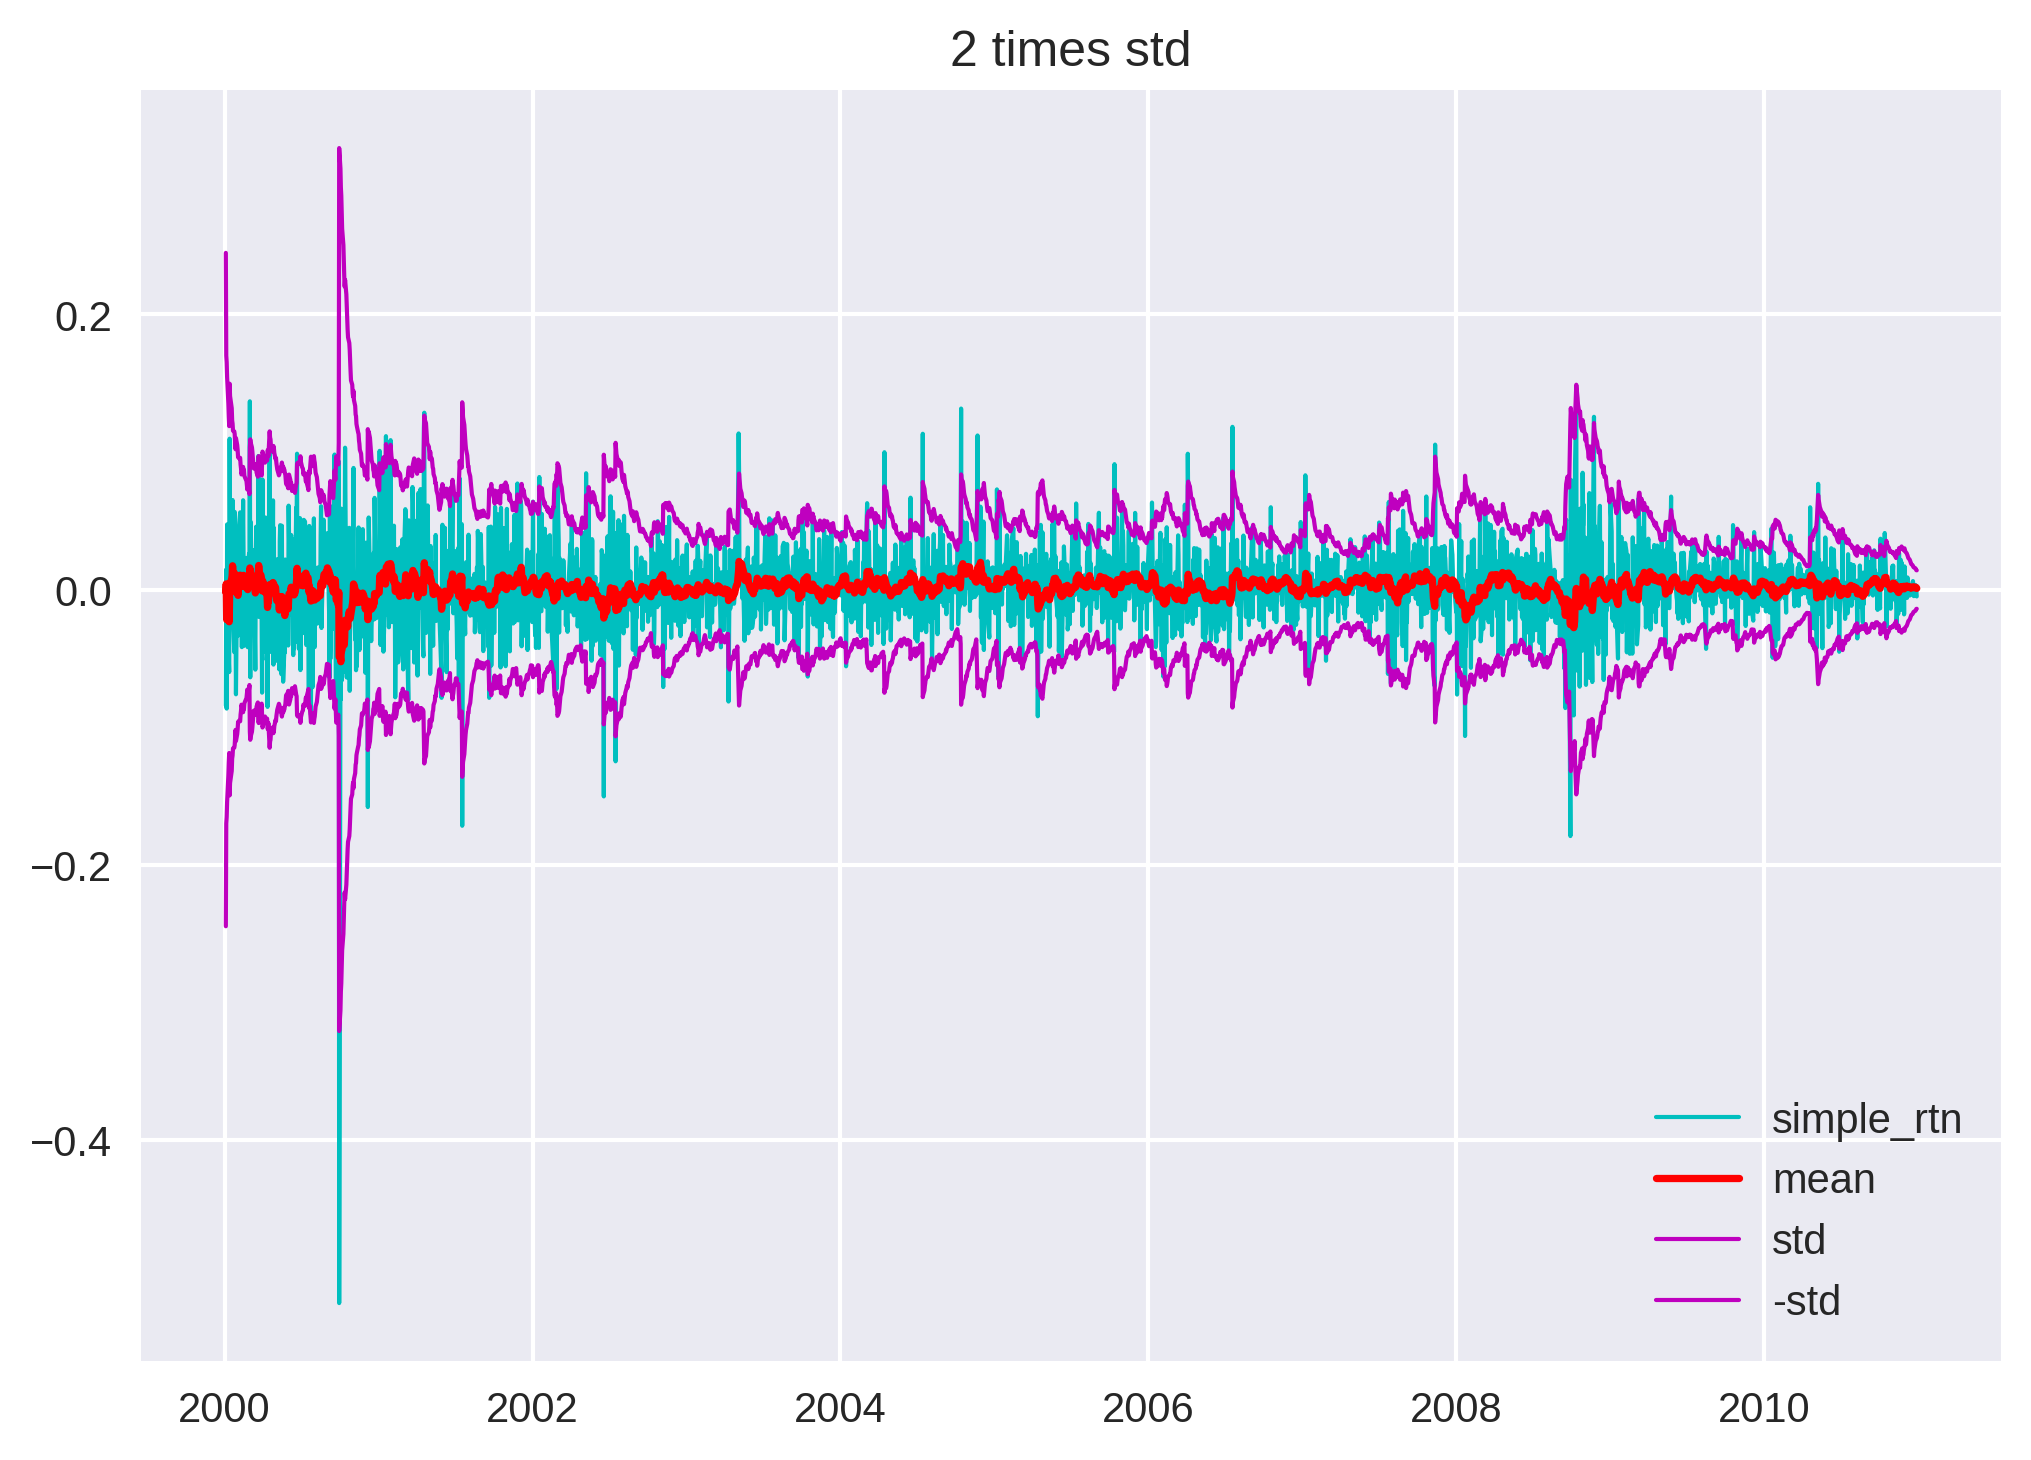

In [8]:
fig, ax = plt.subplots()
ax.plot(d1.index, d1['simple_rtn'], label='simple_rtn',c='c', lw=1)
ax.plot(d1.index, d1['mean'], label= 'mean',c='r')
ax.plot(d1.index, 2*d1['std'], label= 'std',linestyle='-',c='m', lw=1 )
ax.plot(d1.index, -2*d1['std'],label='-std', linestyle='-',c='m', lw=1)
ax.set_title('2 times std')
ax.legend(loc='lower right')

In [15]:
import numpy as np

condition = (d1['simple_rtn'] > d1['mean'] + d1['std'] * 2) | (d1['simple_rtn'] < d1['mean'] - d1['std']* 2) 
d1['outlier'] = np.where(condition, 1, 0)

outliers = d1.loc[d1['outlier'] == 1, ['simple_rtn']]
outliers.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 58 entries, 2000-03-01 to 2010-10-15
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   simple_rtn  58 non-null     float64
dtypes: float64(1)
memory usage: 928.0 bytes


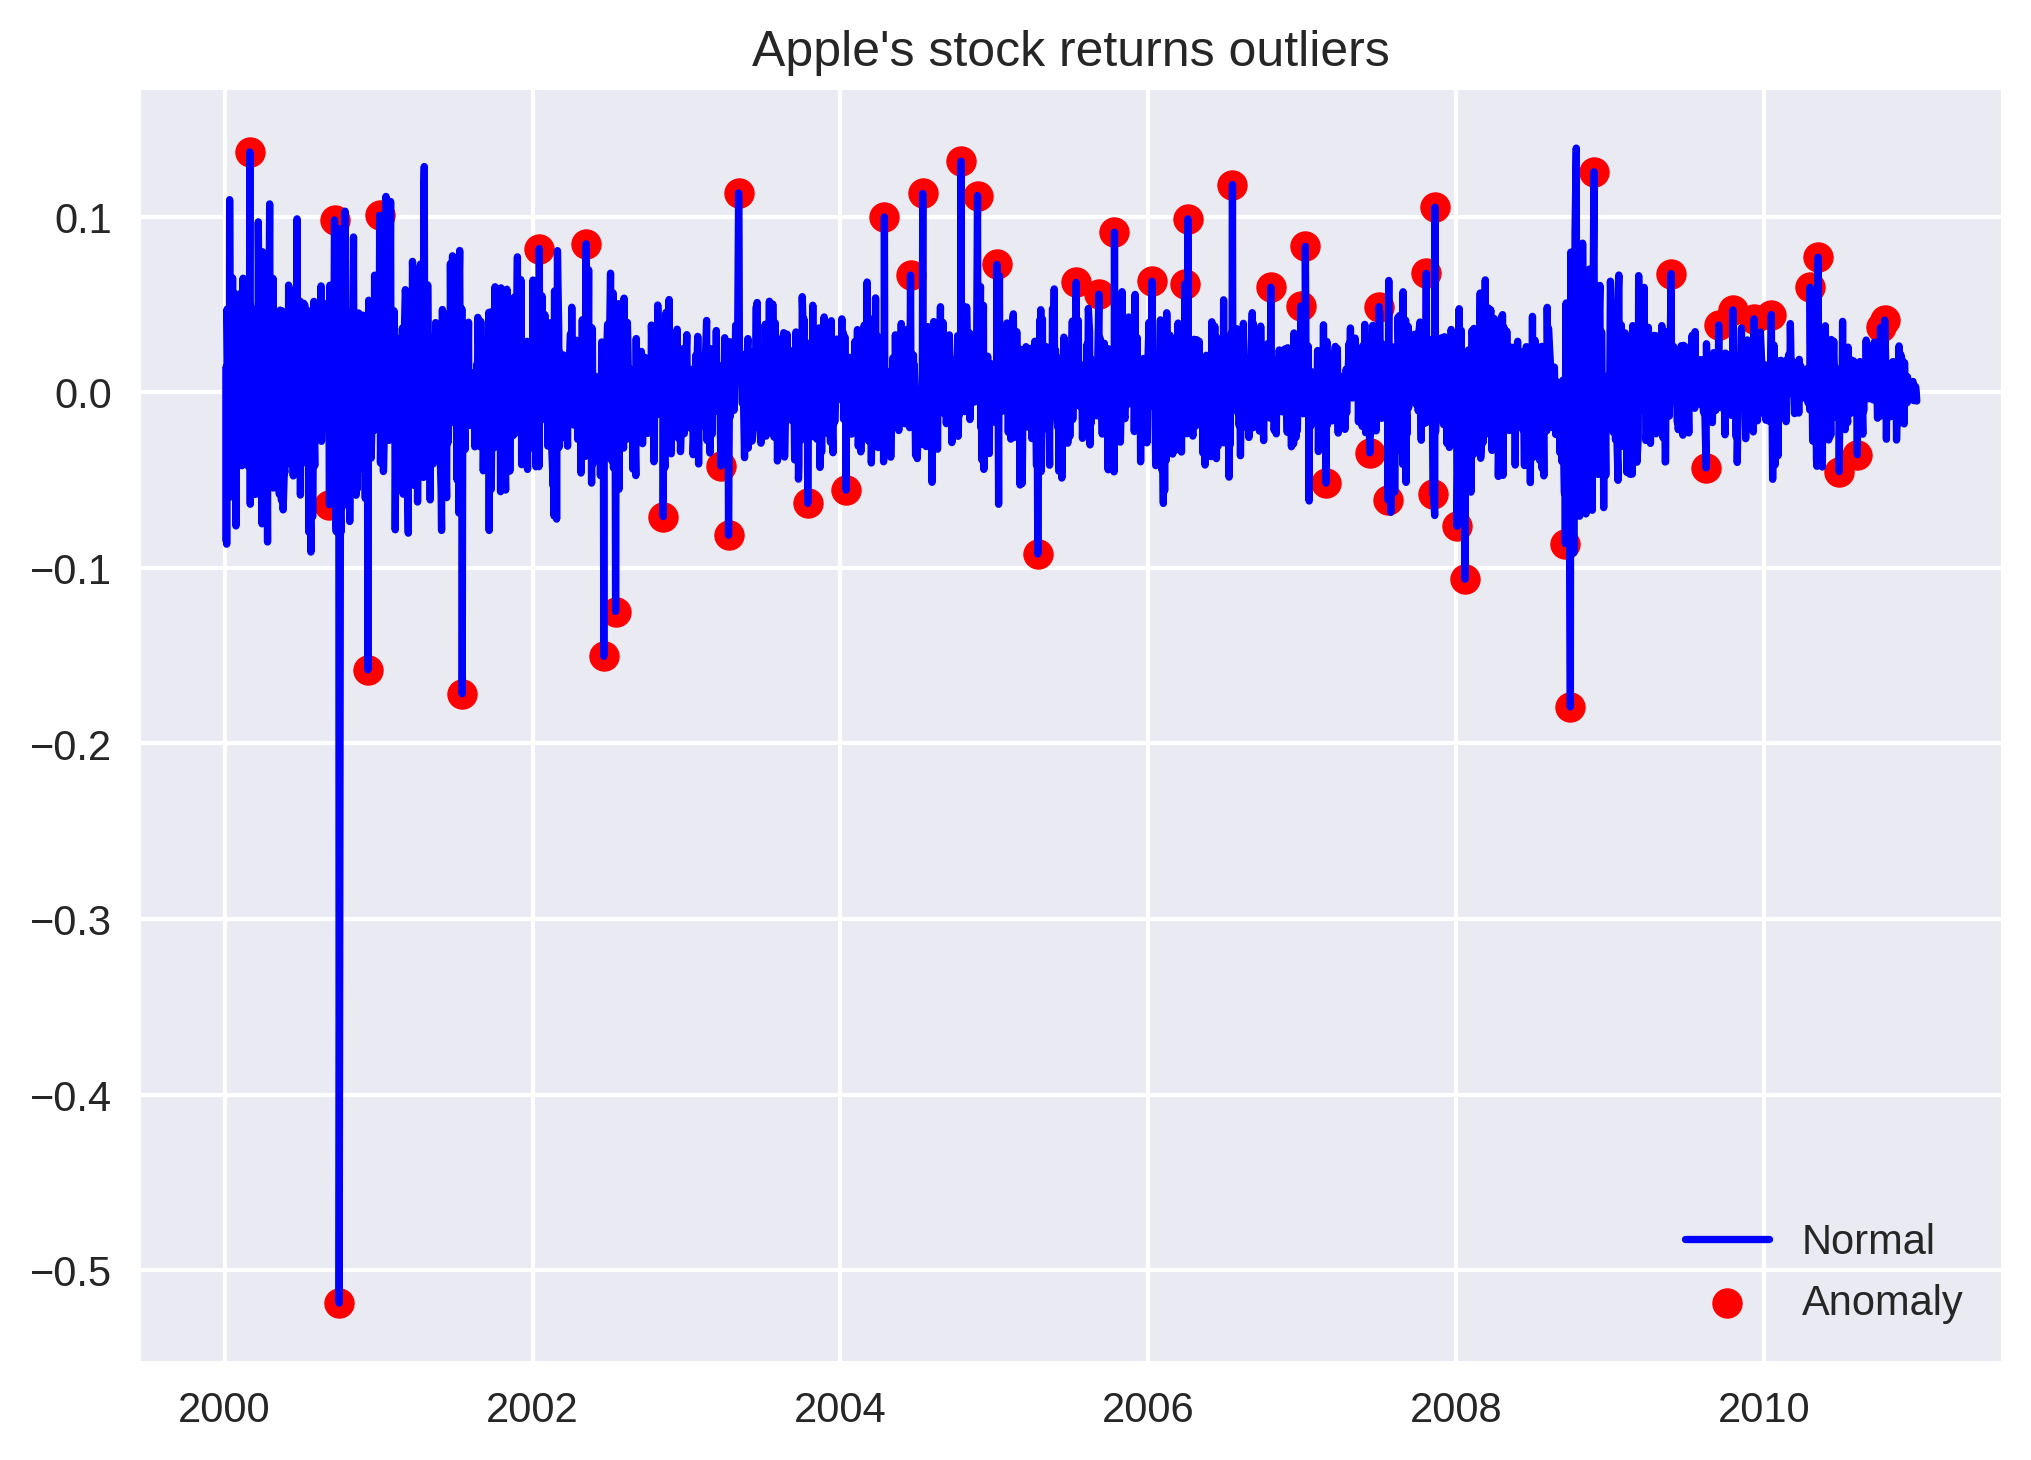

In [16]:
fig, ax = plt.subplots()
ax.plot(d1.index, d1.simple_rtn, 
        color='blue', label='Normal')
ax.scatter(outliers.index, outliers.simple_rtn, 
           color='red', label='Anomaly')
ax.set_title("Apple's stock returns outliers")
ax.legend(loc='lower right')